# Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





## Data Description

_Keep in mind that these values mentioned below are average values._

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
# Global flag to suppress output files while debugging
SUPPRESS_OUTFILES=False

# increase DF ouptput length for debugging
pd.options.display.max_rows = 400000

## Problems

Use the prompts below to get started with your data analysis.  

### Read in the `coupons.csv` file.

In [9]:
data = pd.read_csv('data/coupons.csv')

In [10]:
data.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


### Investigate the dataset for missing or problematic data.

In [12]:
print('Dimensions of data read in (rows x columns): {}'.format(data.shape))

Dimensions of data read in (rows x columns): (12684, 26)


**%Completeness of each column - is there any missing data?**

In [14]:
data.isnull().sum().transform(lambda x: (1 - (x / data.shape[0])) * 100).round(2)

destination             100.00
passanger               100.00
weather                 100.00
temperature             100.00
time                    100.00
coupon                  100.00
expiration              100.00
gender                  100.00
age                     100.00
maritalStatus           100.00
has_children            100.00
education               100.00
occupation              100.00
income                  100.00
car                       0.85
Bar                      99.16
CoffeeHouse              98.29
CarryAway                98.81
RestaurantLessThan20     98.98
Restaurant20To50         98.51
toCoupon_GEQ5min        100.00
toCoupon_GEQ15min       100.00
toCoupon_GEQ25min       100.00
direction_same          100.00
direction_opp           100.00
Y                       100.00
dtype: float64

### Decide what to do about your missing data -- drop, replace, other...

* Drop car column: only 0.85% rows have values
* Keep the rest of the columns at this time - on average 98% rows have non-null data
    * Will decide later as we answer specific questions what to do about incomplete rows

In [16]:
car_nulls = data.car.isnull().sum()
data = data.drop(labels=('car'), axis=1)
print('Dropped column \'car\' since {} of {} rows are null - only {:.2f}% useful rows!'
      .format(car_nulls, data.shape[0], (1 - (car_nulls / data.shape[0])) * 100)
)

Dropped column 'car' since 12576 of 12684 rows are null - only 0.85% useful rows!


### What proportion of the total observations chose to accept the coupon? 

**Strategy**

* Data Prep:
    * Create new dataframe using Groupby Y and pull out the Y column
    * Grab the value_counts()
    * Add a new column 'Responses' and convert Y=(0,1) -> Responses=('Rejected','Accepted') for labels
* Visualization: Pie chart
    * Generate and prettify graph
 
**Findings**
* Overall Coupon Acceptance Rate: 56.84%
* 7210 accepted and 5474 did not from a total of 12684 responses

![](images/pie-acceptance-overall.png)


In [18]:
# Prep data for Pie chart
acceptance_rate_pie = data.groupby('Y')['Y'].value_counts().rename('Responses').reset_index()

# Calculate overall acceptance rate
nayes = acceptance_rate_pie.iloc[0, 1]
ayes = acceptance_rate_pie.iloc[1, 1]
acceptance_rate = (ayes / data.shape[0]) * 100

print('Overall Coupon Acceptance Rate: {:.2f}%'
      .format(acceptance_rate))
print('{} accepted and {} did not from a total of {} responses'
      .format(ayes, nayes, data.shape[0]))

#acceptance_rate_pie

Overall Coupon Acceptance Rate: 56.84%
7210 accepted and 5474 did not from a total of 12684 responses


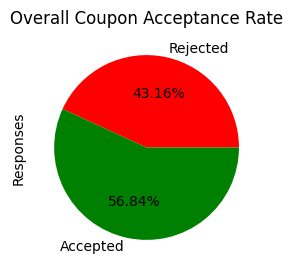

In [19]:
names = ('Rejected', 'Accepted')
colors = ('red', 'green')
plt.rcParams['figure.figsize'] = (3,3)

acceptance_rate_pie.plot.pie(y='Responses',
                             autopct='%1.2f%%', 
                             labels=names,
                             colors=colors,
                             legend=False
                            )
plt.title('Overall Coupon Acceptance Rate')

if not SUPPRESS_OUTFILES:
    plt.savefig('images/pie-acceptance-overall.png')

plt.show()

### Use a bar plot to visualize the `coupon` column.

**Strategy**

* Data Prep
    * Create new dataframe to Groupby coupon and pull out the Y column
    * Grab the value_counts()
    * Add a new column 'Responses' and convert Y=(0,1) -> Responses=('Rejected','Accepted') for labels
* Generate and prettify graph

![](images/bar-coupons.png)


In [21]:
# Use groupby to marshall Responses in new column with values based on column Y
coupon = (data
          .groupby('coupon')['Y']
          .value_counts()
          .reset_index()
         )

# Convert Y=(0,1) -> Responses=('Rejected','Accepted') for labels
#coupon.Y = map_01_to_accept_reject(coupon.Y)
coupon.Y = coupon.Y.map({0:'Rejected',
                         1:'Accepted'
                        })
coupon = coupon.rename(columns={'Y':'Responses'})
coupon#.head()


,coupon,Responses,count
0,Bar,Rejected,1190
1,Bar,Accepted,827
2,Carry out & Take away,Accepted,1760
3,Carry out & Take away,Rejected,633
4,Coffee House,Rejected,2001
5,Coffee House,Accepted,1995
6,Restaurant(20-50),Rejected,834
7,Restaurant(20-50),Accepted,658
8,Restaurant(<20),Accepted,1970
9,Restaurant(<20),Rejected,816


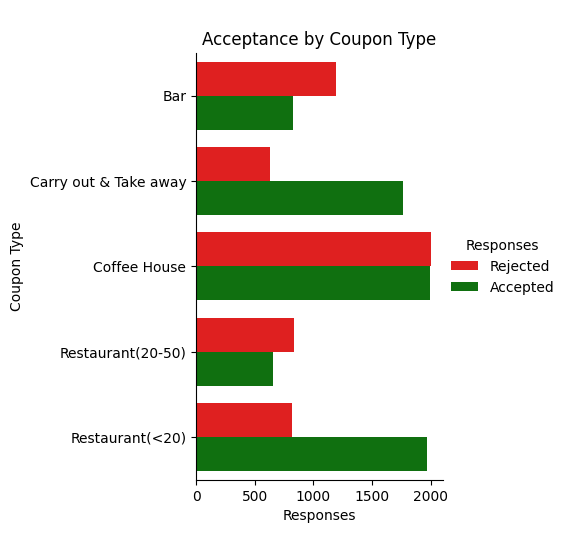

In [22]:
# Generate graph and prettify

plt.rcParams["figure.figsize"] = (12,12)

sns.catplot(data=coupon, kind='bar',
            y='coupon', x='count', hue='Responses',
            palette={'Rejected':'red', 'Accepted':'green'}
           )
plt.title('\nAcceptance by Coupon Type')
plt.xlabel('Responses')
plt.ylabel('Coupon Type')

if not SUPPRESS_OUTFILES:
    plt.savefig('images/bar-coupons.png')

plt.show()

### Use a histogram to visualize the temperature column.

**Strategy**

* No data prep needed - we can just graph it using sns.histplot

![](images/bar-temps.png)


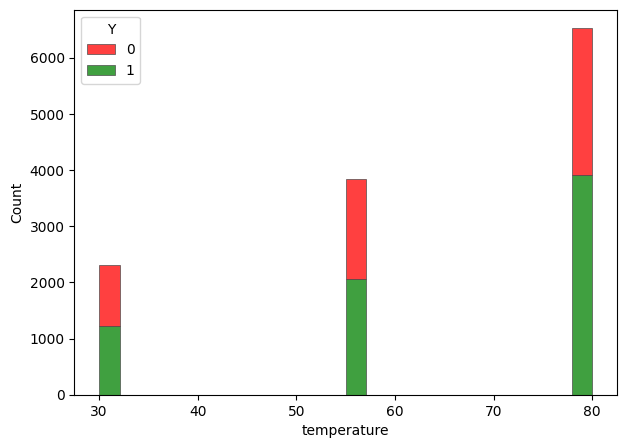

In [24]:
# No prep needed, just graph it

plt.rcParams["figure.figsize"] = (7,5)

sns.histplot(
    data=data,
    x='temperature', hue='Y',
    multiple='stack', #bins=50,
    edgecolor='.3', linewidth=.5,
    palette=['red','green'] #, alpha=0.5,
)

if not SUPPRESS_OUTFILES:
    plt.savefig('images/bar-temps.png')

## Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  


### Utility Functions

#### Generate stacked-barplots for criteria-based queries - reused in multiple places

1. ```graph_criteria_query_barchart```
    * This utility function is used to generate the Acceptance Stacked Bar graphs based on criteria queries for the various investigations
    * Called multiple times to visualize the results of criteria-based queries
1. ```calculate_metrics```
    Converts output from ```build_graph_data_row``` that can be passed to ```graph_criteria_query_barchart``` for graphing
3. ```build_graph_data_row```
    Converts the criteria query data into a single row that can be used to generate and graph metrics for the criteria

In [28]:
# graph it now
def graph_criteria_query_barchart(graph_df, label_x, label_y, label_t, png_out_filepath):
    """
    Generates a stacked bar graph for data in the following dictionary format:
    
        {0: {0: 1144, 1: 46},
         1: {0: 674, 1: 153},
         'criteria': {0: '3 or fewer', 1: 'More than 3'},
         'total': {0: 1818, 1: 199},
         'rate': {0: 37.07, 1: 76.88}}
    
    where
    
        0: Rejected coupons
        1: Accepted coupons
        criteria: Label for x-axis that was used to query the coupons data. Must be unique per row
        total: col 0 + col 1
        rate: Acceptance rate
        
    
    :param graph_df: DF in the above format
    :param label_x: x-axis label
    :param label_y: y-axis label
    :param label_t: title
    :param png_out_filepath: output filepath to save graph as a PNG. Pass None to not save the graph image
    """
    sns.set_theme(style='darkgrid', palette=None)

    fig, ax = plt.subplots(figsize=(10,5))

    # Start the bar plot using the totals in red
    bar_total = ax.bar(graph_df['criteria'], graph_df['total'], color = 'red')

    # Overlay with accepted as green
    bar_accepted = ax.bar(graph_df['criteria'], graph_df[1], color = 'green')

    # Adding the values from column '1' on the bars
    for i, bar in enumerate(bar_accepted):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # x position
            bar.get_y() + height / 2,  # y position (middle of the bar)
            f'{graph_df["rate"][i]:.2f}%',  # text (the rate value)
            ha='center',  # horizontal alignment
            va='center',  # vertical alignment
            color='orange',  # text color
            fontsize=12  # text font size
        )

    # Create the legend
    topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
    bottombar = plt.Rectangle((0,0),1,1,fc='green',  edgecolor = 'none')
    l = plt.legend([bottombar, topbar], ['Accepted', 'Rejected'], loc=0)
    #l.draw_frame(False)

    ax.set_xlabel(label_x)
    ax.set_ylabel(label_y)
    ax.set_title(label_t)

    if (not SUPPRESS_OUTFILES) and (png_out_filepath != None):
        plt.savefig(png_out_filepath)

    plt.show()

In [29]:
def calculate_metrics(df):
    '''
    Given an array with the structure required by graph_criteria_query_barchart(), adds 'total' and 'rate' columns
    
    :parameter df: DF containing the data
    :return: Returns a new DF
    '''
    gdf = pd.DataFrame(df)
    
    if (len(df) == 0):
        return gdf

    # Calculate totals and acceptance rate
    gdf['total'] = gdf[0] + gdf[1]
    gdf['rate'] = (gdf[1] / gdf['total']).mul(100).round(2)

    # Rename the criteria column
    gdf = gdf.rename(columns={2:'criteria'})
    
    return gdf

In [30]:
def build_graph_data_row(df_rows, df_label):
    """
    Given a DF with data rows, builds the data structure required for calculating the metrics for criteria query
    
    :param df_rows: DF containg rows from our CSV that contain the results from the criteria query
    :param df_label: Label to attach to the metrics data to calculated
    :return: Returns the data formatted for input to the calculate_metrics() function
    """
    
    # Get the stats for IN criteria - start with full data
    graph_row = (df_rows.groupby('Y')['Y'].value_counts())
    graph_row[2] = df_label
    
    return graph_row.values


#### Generate barplot grouped by category criteria

1. ```graph_grouping_barchart```
    * This utility function is used to generate the side-by-side category grouped bar charts for the various investigations
    * Called multiple times to visualize the results of criteria-based queries

In [32]:
def graph_grouping_barchart(x_categories, groups, colors, 
                            title, label_y,
                            width, height
                           ):
    """
    Generates a bargraph grouped by categories :

    where
    
        x_categories: List of categories to use for grouping along the x-axis
        groups: Dictionary {'key': Series} where each bar in the group is rendered with the key in the Legend and Series as the bar height
        colors: List containing the colors for the bar groups and Legend
        label_y: y-axis label
        width: Resize graph to width
        height: Resize graph to height

    
    :param graph_df: DF in the above format
    :param label_x: x-axis label
    :param label_y: y-axis label
    :param label_t: title
    :param png_out_filepath: output filepath to save graph as a PNG. Pass None to not save the graph image
    """
    
    plt.rcParams["figure.figsize"] = (width, height)
    
    # Create the plot
    x = np.arange(len(x_categories))  # the label locations
    width = 0.15  # the width of the bars
    multiplier = 0
    
    fig, ax = plt.subplots()#layout="constrained")
    
    for (attribute, measurement), color in zip(groups.items(), colors):
        offset = width * multiplier
        rects = ax.bar(
            x + offset,
            measurement,
            width,
            label=attribute,
            color=color
        )
        multiplier += 1
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(label_y)
    ax.set_title(title)
    ax.set_xticks(x + width * (len(groups) - 1) / 2)
    ax.set_xticklabels(x_categories)
    ax.legend()
    
    fig.tight_layout()
    
    # Display the plot
    plt.show()


### Create a new `DataFrame` that contains just the bar coupons.

**Strategy**

* Make a new copy of the 'curated' data from earlier called 'coupons_bar'
* Dropped 21 rows in the resulting DataFrame as they are only 0.17% of the total Bar coupons and won't impact this investigation

In [34]:
# Make a new copy of the "curated" data from earlier

coupons_bar = data.copy();
coupons_bar = coupons_bar[data.coupon == 'Bar']
coupons_bar.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1


In [35]:
NA_values = coupons_bar.isna().sum()['Bar']

In [36]:
# Drop nulls
coupons_bar.dropna(subset=['Bar'], inplace=True)
coupons_bar[['Bar']].value_counts()

Bar  
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [37]:
print('Dropped {} rows from {} where coupons_bar[[\'Bar\']].isna()'
      .format(NA_values, data.shape[0]))

Dropped 21 rows from 12684 where coupons_bar[['Bar']].isna()


### What proportion of bar coupons were accepted?

**Strategy**

* Calcualte the Bar Coupon Acceptance Rate using coupons_bar.shape
* Visualize the data in a couple of different ways 
    * Visualization 1: Pie chart of overall Bar Coupon Acceptance Rate
    * Visualization 2: Bar graph of Bar Coupon Acceptance distribution


In [39]:
acceptance_rate_bar = (coupons_bar[coupons_bar['Y'] == 1].shape[0] / coupons_bar.shape[0]) * 100
print('Overall Bar Coupon Acceptance Rate: {:.2f}%'.format(acceptance_rate_bar))

Overall Bar Coupon Acceptance Rate: 41.03%


#### Visualization 1: Pie chart of the Overall Bar Coupon Acceptance Rate

**Strategy**
* Data Prep: Create acceptanece_rate_pie DF using groupby('Y').value_counts()
* Fix the labels and set the color appropriately as above

**Findings**
* The overall Bar Coupon Acceptance Rate as a Pie Graph

![](images/pie-acceptance-overall-bar.png)


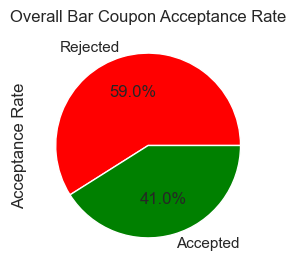

In [41]:
# Create the DF for the graph
acceptance_rate_pie = coupons_bar.groupby('Y')['Y'].value_counts().rename('Acceptance Rate').reset_index()

# Prettify graph
names = ('Rejected', 'Accepted')
colors = ('red', 'green')
plt.rcParams["figure.figsize"] = (3,3)
sns.set_theme(style='darkgrid', palette=None)

acceptance_rate_pie.plot.pie(y='Acceptance Rate',
                             autopct='%1.1f%%', 
                             labels=names,
                             colors=colors,
                             legend=False
                            )
plt.title('Overall Bar Coupon Acceptance Rate')

if not SUPPRESS_OUTFILES:
    plt.savefig('images/pie-acceptance-overall-bar.png')

#### Visualization 2: Bar graph of the Overall Bar Coupon Acceptance distribution

**Strategy**
* Data Prep
    * Create new DF with counts of each coupon type groupby('Bar').value_counts()
    * Create a pivot table with each row containing both acceptance and rejection per coupon type
    * Calculate totals and acceptance rate for each row (bucket)
    * Manually order the buckets so they x-axis appear 'natural' like a time-series
* Bar graph: ```Call graph_criteria_query_barchart()``` to graph the data

**Findings**
* Overall Coupon Accepted / Rejected as a stacked-bar graph showing the distribution per Bar Coupon Type

![](images/bar-acceptance-overall.png)


In [43]:
# Bar acceptance buckets by count
bar_count = (coupons_bar
             .groupby('Bar')['Y']
             .value_counts()
             .reset_index()
)
#bar_count

In [44]:
bar_p = bar_count.pivot(index='Bar', columns='Y', values='count').reset_index()
bar_p['total'] = bar_p[0] + bar_p[1]
bar_p['rate'] = (bar_p[1] / bar_p['total']).mul(100).round(2)
#bar_p

In [45]:
# Manually sort based on frequency of visiting a bar
#col_order = [2, 5, 4, 0, 1, 3]
col_order = [4, 3, 0, 1, 2]
bar_p = bar_p.reindex(col_order)
#bar_p

In [46]:
# re-foramt data to send to graph_criteria_query_barchart() function
# 1. rename Bar column to criteria
# 2. Remove the Y column index

bar_p = bar_p.rename(columns={'Bar':'criteria'})

bar_temp_df = pd.DataFrame(bar_p.to_numpy(), 
                           columns=['criteria', 0, 1, 'total', 'rate'])
bar_temp_df

,criteria,0,1,total,rate
0,never,674,156,830,18.8
1,less1,317,253,570,44.39
2,1~3,140,257,397,64.74
3,4~8,33,117,150,78.0
4,gt8,13,36,49,73.47


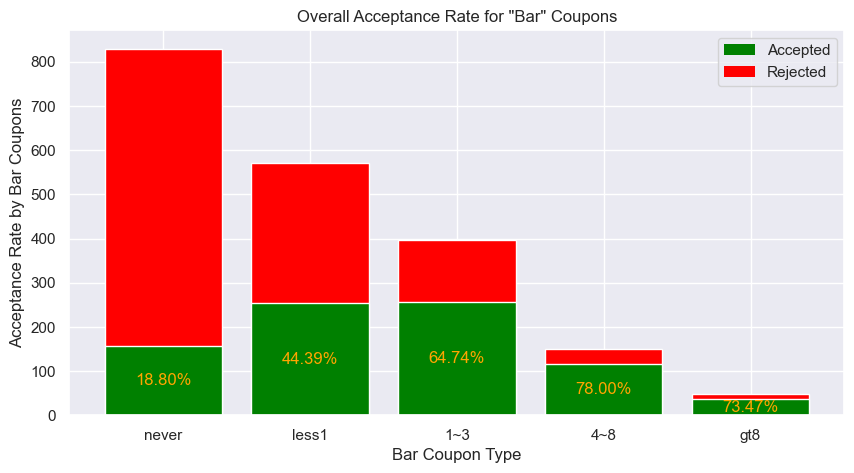

In [47]:
# Grapht it!
label_x='Bar Coupon Type'
label_y='Acceptance Rate by Bar Coupons'
label_t='Overall Acceptance Rate for "Bar" Coupons'
outfile='images/bar-acceptance-overall.png'
graph_criteria_query_barchart(bar_temp_df, label_x, label_y, label_t, outfile)

### Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

**Strategy**

* Criteria: Visit bar 3 or fewer times a month
* Data Preparation
    * Inspect Bar column
    * Define list containing the list of Bar elements that meet the 3 or fewer criteria: 
    ```
    bar_3_or_fewer = ['never', 'less1', '1~3']
    ```
* Run criteria query for both ```in @bar_3_or_fewer``` and ```not in @bar_3_or_fewer``` cases
* Load the results into DF for graphing and call graph_criteria_query_barchart() function

**Findings**

1. Acceptance rate for the less frequent visitors was much lower (37.06%) compared to the "regulars" who accepted the coupons 76.88% even though it was a much larger group (1,797 vs 199)
1. The results were as expected - "regulars" were almost twice as likely to redeem the coupons, even though there were fewer overall regulars 

![](images/bar-visit-3-or-more.png)

In [49]:
# criteria: 3 or fewer visits per month

# Criteria for the visit frequency
bar_3_or_fewer = ['never', 'less1', '1~3']

graph_data = []
criteria='Bar in @bar_3_or_fewer'
criteria_not='Bar not in @bar_3_or_fewer'

# Get the stats for IN @bar_3_or_fewer
graph_row = (coupons_bar.query(criteria)
             .groupby('Y')['Y']
             .value_counts()
)
graph_row[2] = '3 or fewer'
graph_data.append(graph_row.values)

# Get the stats for NOT IN @bar_3_or_fewer
graph_row = (coupons_bar.query(criteria_not)
             .groupby('Y')['Y']
             .value_counts()
)
graph_row[2] = 'More than 3'
graph_data.append(graph_row.values)
#graph_data

In [50]:
# Load the graph data into DF for graphing
graph_df = pd.DataFrame(graph_data)

# Calculate totals and acceptance rate
graph_df['total'] = graph_df[0] + graph_df[1]
graph_df['rate'] = (graph_df[1] / graph_df['total']).mul(100).round(2)

# Rename the criteria column
graph_df = graph_df.rename(columns={2:'criteria'})
graph_df

,0,1,criteria,total,rate
0,1131,666,3 or fewer,1797,37.06
1,46,153,More than 3,199,76.88


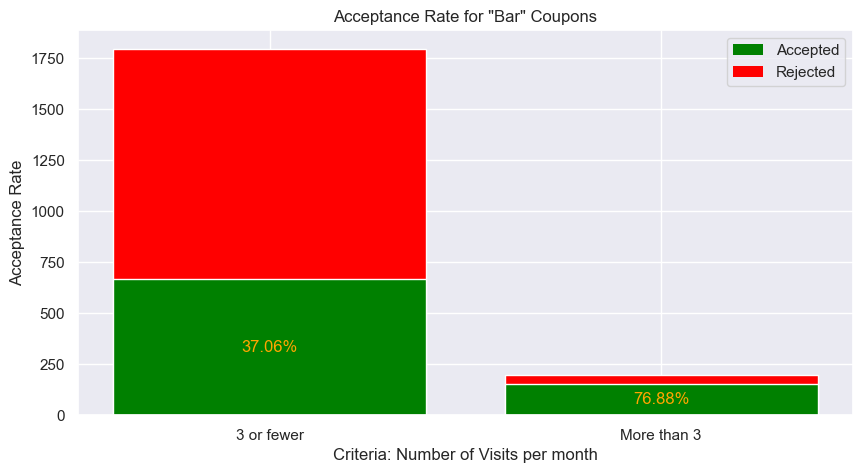

In [51]:
# Grapht it!
label_x='Criteria: Number of Visits per month'
label_y='Acceptance Rate'
label_t='Acceptance Rate for "Bar" Coupons'
outfile='images/bar-visit-3-or-more.png'
graph_criteria_query_barchart(graph_df, label_x, label_y, label_t, outfile)

### Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

**Strategy**

* Criteria: Visit bar more than once and over 25 yrs old
* Data Preparation
    * Inspect the age column for clean data
        * Create a new DF for our query - copy needed because we need to normalize the ages and don't want to mess up the clean data
        * Convert age=below21 to 20 and age=50plus to 51 - good enough for age > 25 criteria
        * Convert 'age' to ints
    * Define lists for SQL criteria: 
        ```
        bar_1_or_more = ['1~3','4~8', 'gt8']
        ```
* Run criteria query
* Load the results into DF for graphing and call graph_criteria_query_barchart() function

**Findings**

1. Criteria query SQL
```
criteria='(Bar in @bar_1_or_more and age > 25)'
criteria_not='Bar not in @bar_1_or_more and age <= 25'
```
1. Acceptance rate for those who visit a bar more than once a month and are over 25yrs old was higher (69.52%) compared to the rest of the population (39.45%)
1. The results were as expected - bar-goers of legal age were almost twice as likely to redeem the coupons

![](images/bar-25plus-frequent.png)

In [53]:
#coupons_bar.age.value_counts()

In [54]:
# Create a new DF for our query - copy needed because we need to normalize the ages to ints
temp_coupons_bar = coupons_bar.copy()

# convert age=below21 to 20 and age=50plus to 51 - good enough for age > 25 criteria
temp_coupons_bar['age'] = temp_coupons_bar['age'].replace({'below21': 20, '50plus': 51})
temp_coupons_bar['age'] = temp_coupons_bar['age'].astype(int)

#temp_coupons_bar.age.value_counts()

In [55]:
# criteria for visit frequecy
bar_1_or_more = ['1~3','4~8', 'gt8']
criteria = ''

graph_data = []

# Get the stats for IN @bar_3_or_fewer
graph_row = (temp_coupons_bar.query('(Bar in @bar_1_or_more and age > 25)')
             .groupby('Y')['Y']
             .value_counts()
)
graph_row[2] = 'Visits > 1 and age > 25'
graph_data.append(graph_row.values)

# Get the stats for NOTIN @bar_3_or_fewer
graph_row = (temp_coupons_bar.query('Bar not in @bar_1_or_more and age <= 25')
             .groupby('Y')['Y']
             .value_counts()
)
graph_row[2] = 'NOT (Visits > 1 and age > 25)'
graph_data.append(graph_row.values)
#graph_data

In [56]:
# Load the graph data into DF for graphing
graph_df = pd.DataFrame(graph_data)

# Calculate totals and acceptance rate
graph_df['total'] = graph_df[0] + graph_df[1]
graph_df['rate'] = (graph_df[1] / graph_df['total']).mul(100).round(2)

# Rename the criteria column
graph_df = graph_df.rename(columns={2:'criteria'})
graph_df

,0,1,criteria,total,rate
0,128,292,Visits > 1 and age > 25,420,69.52
1,198,129,NOT (Visits > 1 and age > 25),327,39.45


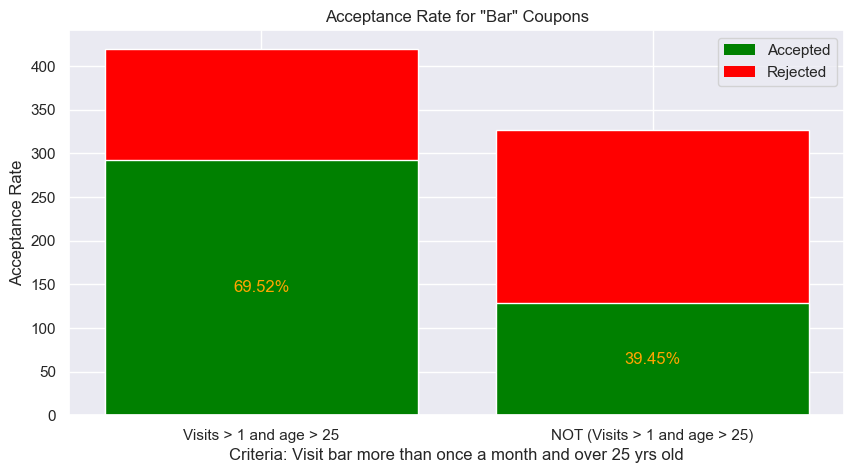

In [57]:
# Grapht it!
label_x='Criteria: Visit bar more than once a month and over 25 yrs old'
label_y='Acceptance Rate'
label_t='Acceptance Rate for "Bar" Coupons'
outfile='images/bar-25plus-frequent.png'
graph_criteria_query_barchart(graph_df, label_x, label_y, label_t, outfile)

### Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


**Strategy**

* Criteria: Visits > 1 and passengers != 'Kid(s)' and occupations != 'Farming Fishing & Forestry'
* Data Preparation
    * Inspect the passenger column for clean data - looks good!
    * Inspect the occupation column for clean data - looks good
        * Create a new DF for our query - copy needed because we need to normalize the ages and don't want to mess up the clean data
        * Convert age=below21 to 20 and age=50plus to 51 - good enough for age > 25 criteria
        * Convert 'age' to ints
    * Define lists for SQL criteria: 
        ```
        bar_1_or_more = ['1~3','4~8', 'gt8']
        passengers = ['Kid(s)']
        occ_farming = ['Farming Fishing & Forestry']
        ```
* Run criteria query
* Load the results into DF for graphing and call graph_criteria_query_barchart() function

**Findings**

1. Criteria query SQL
```
criteria='Bar in @bar_1_or_more) and (passanger not in @passengers) and (occupation not in @occ_farming'
criteria_not='not ((Bar in @bar_1_or_more) and (passanger not in @passengers) and (occupation not in @occ_farming))'
```
1. Acceptance rate for those who meet the criteria was higher (71.32%) compared to the rest of the population (29.48%)
1. The overall results were as expected - the contra-group included children passengers and those who had occupations requiring them to get up early in the morning, potentially impeding their ability to accept the coupon. This was true even though the contra-group population was much larger (1,445 vs 551)

![](images/bar-no-kids.png)

In [59]:
#coupons_bar.passanger.value_counts()
#coupons_bar.occupation.value_counts()

In [60]:
# criteria: Visits > 1 and passengers != 'Kid(s)' and occupations != 'Farming Fishing & Forestry'
bar_1_or_more = ['1~3','4~8', 'gt8']
passengers = ['Kid(s)']
occ_farming = ['Farming Fishing & Forestry']

graph_data = []

criteria='((Bar in @bar_1_or_more) and (passanger not in @passengers) and (occupation not in @occ_farming))'
#criteria_not='((Bar not in @bar_1_or_more) and (passanger in @passengers) and (occupation in @occ_farming))'
criteria_not='not ({})'.format(criteria)

# Get the stats for IN criteria
graph_row = (temp_coupons_bar.query(criteria)
             .groupby('Y')['Y']
             .value_counts()
)
graph_row[2] = 'Visits > 1, not a farmer, no kids'
graph_data.append(graph_row.values)

# Get the stats for NOT IN criteria
graph_row = (temp_coupons_bar.query(criteria_not)
             .groupby('Y')['Y']
             .value_counts()
)
graph_row[2] = 'NOT (Visits > 1, not a farmer, no kids)'
graph_data.append(graph_row.values)
#graph_data

In [61]:
metrics = calculate_metrics(graph_data)
metrics

,0,1,criteria,total,rate
0,158,393,"Visits > 1, not a farmer, no kids",551,71.32
1,1019,426,"NOT (Visits > 1, not a farmer, no kids)",1445,29.48


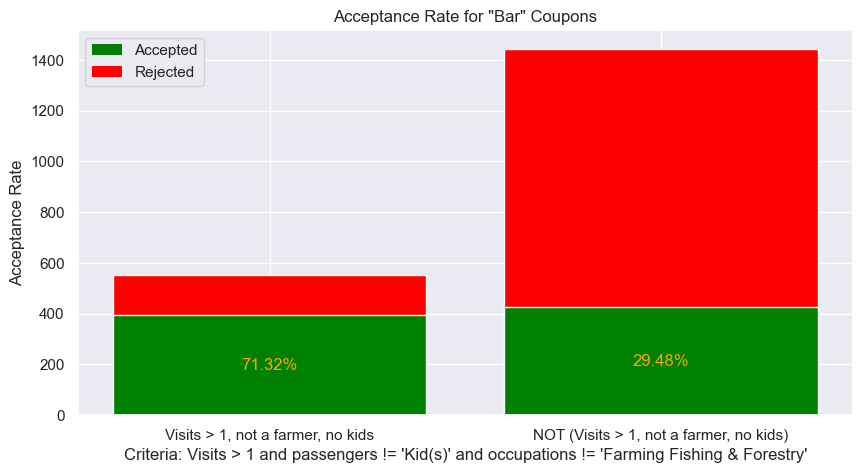

In [62]:
# Grapht it!
label_x="Criteria: Visits > 1 and passengers != 'Kid(s)' and occupations != 'Farming Fishing & Forestry'"
label_y='Acceptance Rate'
label_t='Acceptance Rate for "Bar" Coupons'
outfile='images/bar-no-kids.png'
graph_criteria_query_barchart(metrics, label_x, label_y, label_t, outfile)

### Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 


**Strategy**

* Criteria
    1. Visits > 1 and passengers != 'Kid(s)' and maritalStatus != 'Widowed'
    1. Visits > 1 and passengers != 'Kid(s)' and age < 30
    1. RestaurantLessThan20 more than 4/month and income in less than 50K
* Data Preparation
    * Inspect the maritalStatus column for clean data - looks good!
    * Inspect the RestaurantLessThan20 column for clean data - looks good!
    * Inspect the income column for clean data - looks good
    * Define lists for SQL criteria: 
        ```
        bar_1_or_more = ['1~3','4~8', 'gt8']
        passengers = ['Kid(s)']
        widow = ['Widowed']
        resto_cheap = ['Restaurant(<20)']
        resto_freq = [4~8', 'gt8']
        income = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']
        ```
* Run criteria queries and store the data separate DFs for each query
* Use DF.merge to do a union of all the above DFs and convert to our graph DF format
* Load the results into DF for graphing and call graph_criteria_query_barchart() function

**Findings**

1. Criteria query SQL
```
criteria_1='((Bar in @bar_1_or_more) and (passanger not in @passengers) and (maritalStatus not in @widow))'
criteria_1_not='((Bar not in @bar_1_or_more) or (passanger in @passengers) or (maritalStatus in @widow))'

criteria_2='((Bar in @bar_1_or_more) and (passanger not in @passengers) and age < 30)'
criteria_2_not='((Bar not in @bar_1_or_more) or (passanger in @passengers) or age >= 30)'

criteria_3='((RestaurantLessThan20 in @resto_freq) and (income in @income))'
criteria_3_not='((RestaurantLessThan20 not in @resto_freq) or (income not in @income))'

criteria_or = criteria_1 or criteria_2 or criteria_3
criteria_or_not = not(criteria_1) and not(criteria_2) and not(criteria_3)
```

1. Bucketizing the indvidual criterias
   * Criteria 1: Bar-goers without kids in the vehicle and not widowed were more likely than the overall bar coupon acceptors (71% vs 59%)
   * Criteria 2: Bar-goers under 30 without kid passengers accepted at higher than overall rate (72% vs 59%)
   * Criteria 3: All users who go to cheap restaurants and earn less than 50K accepted coupons at the same rate as overall bar coupon acceptors
1. Acceptance rate for those who meet all the criteria was higher (59.06%) compared to the rest of the population (29.78%)
2. Based on the above finding, we can deduce that bar-goers are more likely to accept the coupon if there is no immediate impediment (kids, getting up early, etc.) to accepting the coupon
1. The overall results were as expected - for each of the Criteria groups 1 thru 3, the acceptance rates were higher because:
    * The target segment was a regular user of bars and restaurants
    * There were no passengers impeding their ability to use the coupon

![](images/bar-OR.png)

In [64]:
# array for storing the graph data for each criteria
graph_data_c = []

# criteria_1: coupon = 'Bar' and Visits > 1 and passengers != 'Kid(s)' and maritalStatus != 'Widowed'

c_type = ['Bar']
bar_1_or_more = ['1~3','4~8', 'gt8']
passengers = ['Kid(s)']
widow = ['Widowed']

criteria_1='((Bar in @bar_1_or_more) and (passanger not in @passengers) and (maritalStatus not in @widow))'
criteria_1_not='((Bar not in @bar_1_or_more) or (passanger in @passengers) or (maritalStatus in @widow))'

df_1 = temp_coupons_bar.query(criteria_1)
df_1_not = temp_coupons_bar.query(criteria_1_not)

# Get the stats for IN criteria - start with full data
graph_data_c.append(build_graph_data_row(df_1, "Criteria 1"))

# Get the stats for NOT IN criteria
graph_data_c.append(build_graph_data_row(df_1_not, "~ Criteria 1"))

#graph_data_c
#print('Shape: df_1: {}, df_1_not: {}'.format(df_1.shape, df_1_not.shape))

In [65]:
# criteria_2: coupon = 'Bar' and Visits > 1 and passengers != 'Kid(s)' and age < 30

criteria_2='((Bar in @bar_1_or_more) and (passanger not in @passengers) and age < 30)'
criteria_2_not='((Bar not in @bar_1_or_more) or (passanger in @passengers) or age >= 30)'

df_2 = temp_coupons_bar.query(criteria_2)
df_2_not = temp_coupons_bar.query(criteria_2_not)

# Get the stats for IN criteria - start with full data
graph_data_c.append(build_graph_data_row(df_2, "Criteria 2"))

# Get the stats for NOT IN criteria
graph_data_c.append(build_graph_data_row(df_2_not, "~ Criteria 2"))

#graph_data_c
#print('Shape: df_2: {}, df_2_not: {}'.format(df_2.shape, df_2_not.shape))

In [66]:
# criteria_3: RestaurantLessThan20 more than 4/month and income in less than 50K

resto_cheap = ['Restaurant(<20)']
resto_freq = ['4~8', 'gt8']
income = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']

criteria_3='((RestaurantLessThan20 in @resto_freq) and (income in @income))'
criteria_3_not='((RestaurantLessThan20 not in @resto_freq) or (income not in @income))'

df_3 = temp_coupons_bar.query(criteria_3)
df_3_not = temp_coupons_bar.query(criteria_3_not)

# Get the stats for IN criteria - start with full data
graph_data_c.append(build_graph_data_row(df_3, "Criteria 3"))

# Get the stats for NOT IN criteria
graph_data_c.append(build_graph_data_row(df_3_not, "~ Criteria 3"))

#graph_data_c
#print('Shape: df_3: {}, df_3_not: {}'.format(df_3.shape, df_3_not.shape))

In [67]:
# query to OR all the criterias
criteria_or = '({} or {} or {})'.format(criteria_1, criteria_2, criteria_3)
df_criteria_or = temp_coupons_bar.query(criteria_or)

#criteria_or

In [68]:
# query to NOT OR all the criterias
# QUERY FUNCTION UNDERSTANDS THAT ~(A OR B) => ~A AND ~B is the same as ~(A OR B) - I don't have to change my code above!!!
#criteria_not_or = '(not {} and not {} and not {})'.format(criteria_1, criteria_2, criteria_3)
criteria_not_or = 'not ({})'.format(criteria_or)
df_criteria_not_or = temp_coupons_bar.query(criteria_not_or)

#criteria_not_or

In [69]:
#print('Shape: df_1: {}, df_1_not: {}'.format(df_1.shape, df_1_not.shape))
#print('Shape: df_2: {}, df_2_not: {}'.format(df_2.shape, df_2_not.shape))
#print('Shape: df_3: {}, df_3_not: {}'.format(df_3.shape, df_3_not.shape))
#print('Shape: df_criteria_or: {}, df_criteria_or_not: {}'.format(df_criteria_or.shape, df_criteria_not_or.shape))

In [70]:
#df_criteria_or.groupby(['coupon','Bar','age','maritalStatus','income','RestaurantLessThan20','passanger','Y'])[[]].value_counts()

In [71]:
# Ok, let's build the full OR'd data rows

# Get the stats for IN criteria - start with full data
graph_data_c.append(build_graph_data_row(df_criteria_or, "OR'd C 1-3"))

# Get the stats for NOT IN criteria
graph_data_c.append(build_graph_data_row(df_criteria_not_or, "~(OR'd C 1-3)"))

#graph_data_c

In [72]:
metrics = calculate_metrics(graph_data_c)
metrics

,0,1,criteria,total,rate
0,158,393,Criteria 1,551,71.32
1,1019,426,~ Criteria 1,1445,29.48
2,94,242,Criteria 2,336,72.02
3,1083,577,~ Criteria 2,1660,34.76
4,184,155,Criteria 3,339,45.72
5,993,664,~ Criteria 3,1657,40.07
6,314,453,OR'd C 1-3,767,59.06
7,863,366,~(OR'd C 1-3),1229,29.78


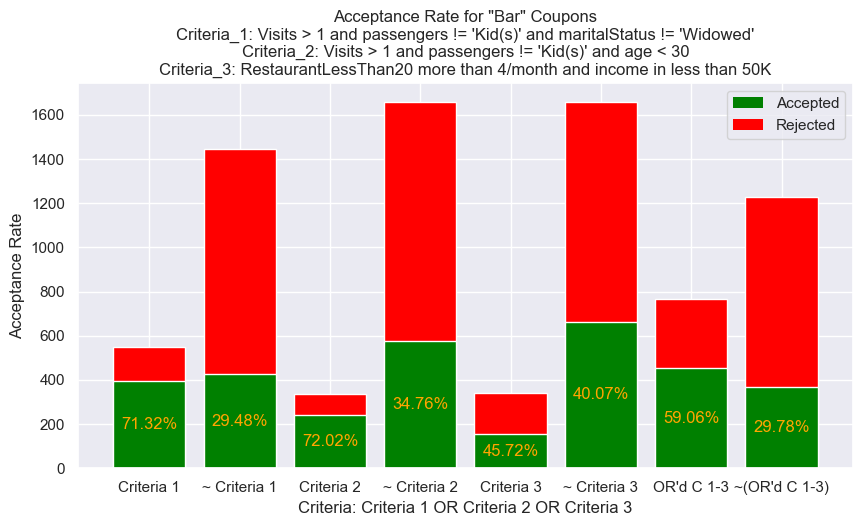

In [73]:
# criteria_1: Visits > 1 and passengers != 'Kid(s)' and maritalStatus != 'Widowed'
# criteria_2: Visits > 1 and passengers != 'Kid(s)' and age < 30
# criteria_3: RestaurantLessThan20 more than 4/month and income in less than 50K
label_c1="Criteria_1: Visits > 1 and passengers != 'Kid(s)' and maritalStatus != 'Widowed'"
label_c2="Criteria_2: Visits > 1 and passengers != 'Kid(s)' and age < 30"
label_c3="Criteria_3: RestaurantLessThan20 more than 4/month and income in less than 50K"

# Grapht it!
label_x="Criteria: Criteria 1 OR Criteria 2 OR Criteria 3"
label_y='Acceptance Rate'
label_t='Acceptance Rate for "Bar" Coupons\n{}\n{}\n{}'.format(label_c1,label_c2, label_c3)
outfile='images/bar-OR.png'
graph_criteria_query_barchart(metrics, label_x, label_y, label_t, outfile)

###  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

We compared the acceptance rates between those who took the coupon offer and rejected them based on the following criteria:

1. Frequency of visits to bars
2. Age of the coupon acceptor
3. Whether there were child passengers in the vehicle
4. Whether their profession required them to get up early in the morning
5. Marital status widowed
6. Frequency of visits to cheap restaurants

Comparing the results, we can draw the following conclusions about those who accepted the bar coupons:

* For _regular_+ bar-goers (visits > 3) they would accept the coupon, but we were likely not changing their behavior
* For _occasional_ bar-goers (visits > 1), they would accept the coupon at higher rates if there was no impediment to their ability to go to the bar (kids, early  wake up, etc.), so we were likely influencing their normal bar-going behavior

This shows that bar-goers are a good target audience for our program.


## Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [77]:
data.coupon.value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [78]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

### Find segments with high likelihood of acceptance and redemptoin

* Find a segment where likelihood of coupon acceptance is high
* Then work with Sales, Marketing and Partnership Teams to build revenue-share streams

Based on the findings from the last investigation, it seems that the most likelihood of the user accepting the coupon is based on their ability to redeem it immediately. Let's take a look at acceptance rates based on direction of travel to see if something jumps out:

In [81]:
data.groupby(['coupon','destination','direction_same','direction_opp','Y']
            )[[]].value_counts()

coupon                 destination      direction_same  direction_opp  Y
Bar                    Home             0               1              0     109
                                                                       1      64
                                        1               0              0     166
                                                                       1     167
                       No Urgent Place  0               1              0     606
                                                                       1     418
                       Work             0               1              0     246
                                                                       1     152
                                        1               0              0      63
                                                                       1      26
Carry out & Take away  Home             0               1              0      81
                                    

Direction
* Carry out - seems like acceptance going opposite is much higher
    * Picking up dinner/lunch on way to home? Change behavior possibility
* Same for cheaper restaurants? Expensive?


In [83]:
coupon_types = data.coupon.values
coupon_types

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', ...,
       'Coffee House', 'Bar', 'Restaurant(20-50)'], dtype=object)

In [84]:
same_df = data.loc[data['direction_same'] == 1]
opp_df = data.loc[data['direction_opp'] == 1]

In [85]:
same_df.groupby(['coupon','Y'])[[]].value_counts()

coupon                 Y
Bar                    0    229
                       1    193
Carry out & Take away  0    235
                       1    558
Coffee House           0    352
                       1    398
Restaurant(20-50)      0    138
                       1    119
Restaurant(<20)        0    184
                       1    318
Name: count, dtype: int64

In [86]:
same_count = (same_df
              .groupby(['coupon','Y'])[[]]
              .value_counts()
              .reset_index()
             )
same_count

,coupon,Y,count
0,Bar,0,229
1,Bar,1,193
2,Carry out & Take away,0,235
3,Carry out & Take away,1,558
4,Coffee House,0,352
5,Coffee House,1,398
6,Restaurant(20-50),0,138
7,Restaurant(20-50),1,119
8,Restaurant(<20),0,184
9,Restaurant(<20),1,318


In [87]:
opp_count = (opp_df
              .groupby(['coupon','Y'])[[]]
              .value_counts()
              .reset_index()
             )
opp_count

,coupon,Y,count
0,Bar,0,961
1,Bar,1,634
2,Carry out & Take away,0,398
3,Carry out & Take away,1,1202
4,Coffee House,0,1649
5,Coffee House,1,1597
6,Restaurant(20-50),0,696
7,Restaurant(20-50),1,539
8,Restaurant(<20),0,632
9,Restaurant(<20),1,1652


In [88]:
same_p = same_count.pivot(index='coupon', columns='Y', values='count').reset_index()
same_p

Y,coupon,0,1
0,Bar,229,193
1,Carry out & Take away,235,558
2,Coffee House,352,398
3,Restaurant(20-50),138,119
4,Restaurant(<20),184,318


In [89]:
same_p['total'] = same_p[0] + same_p[1]
same_p['rate'] = (same_p[1] / same_p['total']).mul(100).round(2)
same_p = same_p.rename(columns={'coupon':'criteria'})
#same_p = pd.DataFrame(same_p.to_numpy(), 
#                      columns=['criteria', 0, 1, 'total', 'rate'])
same_p

Y,criteria,0,1,total,rate
0,Bar,229,193,422,45.73
1,Carry out & Take away,235,558,793,70.37
2,Coffee House,352,398,750,53.07
3,Restaurant(20-50),138,119,257,46.30
4,Restaurant(<20),184,318,502,63.35


In [90]:
same_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   criteria  5 non-null      object 
 1   0         5 non-null      int64  
 2   1         5 non-null      int64  
 3   total     5 non-null      int64  
 4   rate      5 non-null      float64
dtypes: float64(1), int64(3), object(1)
memory usage: 332.0+ bytes


In [91]:
opp_p = opp_count.pivot(index='coupon', columns='Y', values='count').reset_index()
opp_p['total'] = opp_p[0] + opp_p[1]
opp_p['rate'] = (opp_p[1] / opp_p['total']).mul(100).round(2)
opp_p = opp_p.rename(columns={'coupon':'criteria'})
opp_p

Y,criteria,0,1,total,rate
0,Bar,961,634,1595,39.75
1,Carry out & Take away,398,1202,1600,75.12
2,Coffee House,1649,1597,3246,49.20
3,Restaurant(20-50),696,539,1235,43.64
4,Restaurant(<20),632,1652,2284,72.33


In [92]:
#all_count = pd.concat([same_count, opp_count])
#np.concatenate(same_count.to_numpy(), opp_count.to_numpy())
#all_count

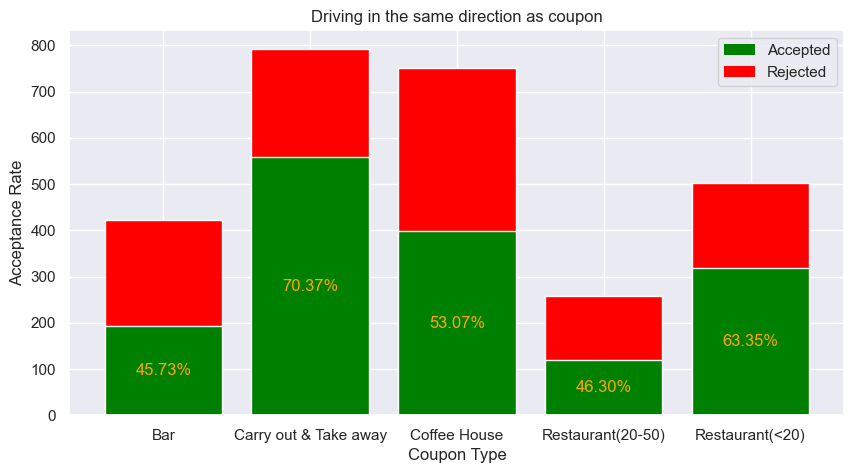

In [93]:
# Grapht it!
label_x='Coupon Type'
label_y='Acceptance Rate'
label_t='Driving in the same direction as coupon'
outfile=None
graph_criteria_query_barchart(same_p, label_x, label_y, label_t, outfile)

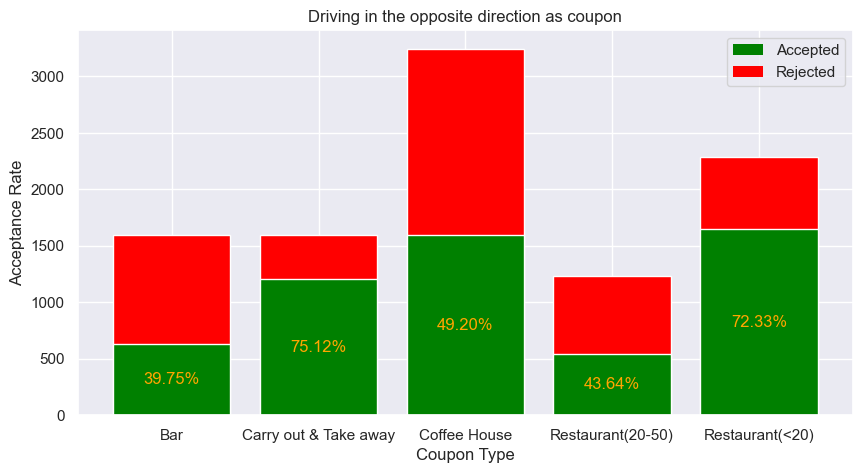

In [94]:
# Grapht it!
label_x='Coupon Type'
label_y='Acceptance Rate'
label_t='Driving in the opposite direction as coupon'
outfile=None
graph_criteria_query_barchart(opp_p, label_x, label_y, label_t, outfile)

In [95]:
all_df=pd.DataFrame([],
                    index=pd.Index(same_p.criteria),
                    columns=pd.MultiIndex.from_product([['Same', 'Opposite'],['total','rate']])
)
#all_df

In [96]:
same_p.set_index('criteria', inplace=True)
all_df.loc[:, ('Same', 'total')] = same_p['total']
all_df.loc[:, ('Same', 'rate')] = same_p['rate']
opp_p.set_index('criteria', inplace=True)
all_df.loc[:, ('Opposite', 'total')] = opp_p['total']
all_df.loc[:, ('Opposite', 'rate')] = opp_p['rate']
all_df

Same        Opposite       
                      total   rate    total   rate
criteria                                          
Bar                     422  45.73     1595  39.75
Carry out & Take away   793  70.37     1600  75.12
Coffee House            750  53.07     3246   49.2
Restaurant(20-50)       257   46.3     1235  43.64
Restaurant(<20)         502  63.35     2284  72.33

### Mucking around with groupby and DF

In [98]:
dest_df = pd.DataFrame(data.groupby(['coupon','destination','direction_same','direction_opp','Y']
                                   )[[]].value_counts())
dest_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 50 entries, ('Bar', 'Home', 0, 1, 0) to ('Restaurant(<20)', 'Work', 1, 0, 1)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   50 non-null     int64
dtypes: int64(1)
memory usage: 1.0+ KB


In [99]:
dest_df_unstacked = dest_df.unstack()
#dest_df_unstacked

In [100]:
dest_df_unstacked = dest_df.unstack()
dest_df_unstacked['total'] = dest_df_unstacked.iloc[:,0] + dest_df_unstacked.iloc[:,1]
dest_df_unstacked['rate'] = (dest_df_unstacked.iloc[:,1] / dest_df_unstacked['total']).mul(100).round(2)
#dest_df_unstacked

In [101]:
# Create IndexSlice to access the multiIndex
idx = pd.IndexSlice

In [102]:
#FrozenList(['coupon', 'destination', 'direction_same', 'direction_opp', 'Y'])
dest_df_unstacked.loc[idx[:,:,:,:]]

count  \
Y                                                                      0   
coupon                destination     direction_same direction_opp         
Bar                   Home            0              1               109   
                                      1              0               166   
                      No Urgent Place 0              1               606   
                      Work            0              1               246   
                                      1              0                63   
Carry out & Take away Home            0              1                81   
                                      1              0                57   
                      No Urgent Place 0              1               232   
                      Work            0              1                85   
                                      1              0               178   
Coffee House          Home            0              1               419   
                                      1              0               173   
                      No Urgent Place 0              1               903   
                      Work            0              1               327   
                                      1              0               179   
Restaurant(20-50)     Home            0              1               299   
                                      1              0                73   
                      No Urgent Place 0              1               204   
                      Work            0              1               193   
                                      1              0                65   
Restaurant(<20)       Home            0              1                78   
                                      1              0               143   
                      No Urgent Place 0              1               356   
                      Work            0              1               198   
                                      1              0                41   

                                                                          \
Y                                                                      1   
coupon                destination     direction_same direction_opp         
Bar                   Home            0              1                64   
                                      1              0               167   
                      No Urgent Place 0              1               418   
                      Work            0              1               152   
                                      1              0                26   
Carry out & Take away Home            0              1               255   
                                      1              0               260   
                      No Urgent Place 0              1               746   
                      Work            0              1               201   
                                      1              0               298   
Coffee House          Home            0              1               182   
                                      1              0               154   
                      No Urgent Place 0              1              1252   
                      Work            0              1               163   
                                      1              0               244   
Restaurant(20-50)     Home            0              1               182   
                                      1              0                99   
                      No Urgent Place 0              1               206   
                      Work            0              1               151   
                                      1              0                20   
Restaurant(<20)       Home            0              1                44   
                                      1              0               232   
                      No Urgent Place 

In [103]:
#FrozenList(['coupon', 'destination', 'direction_same', 'direction_opp', 'Y'])
dest_df_unstacked.loc[idx[:,'Home',:,:]]

count      total   rate
Y                                                      0    1             
coupon                direction_same direction_opp                        
Bar                   0              1               109   64   173  36.99
                      1              0               166  167   333  50.15
Carry out & Take away 0              1                81  255   336  75.89
                      1              0                57  260   317  82.02
Coffee House          0              1               419  182   601  30.28
                      1              0               173  154   327  47.09
Restaurant(20-50)     0              1               299  182   481  37.84
                      1              0                73   99   172  57.56
Restaurant(<20)       0              1                78   44   122  36.07
                      1              0               143  232   375  61.87

In [104]:
#FrozenList(['coupon', 'destination', 'direction_same', 'direction_opp', 'Y'])
dest_df_unstacked.loc[idx[:,'Work',:,:]]

count      total   rate
Y                                                      0    1             
coupon                direction_same direction_opp                        
Bar                   0              1               246  152   398  38.19
                      1              0                63   26    89  29.21
Carry out & Take away 0              1                85  201   286  70.28
                      1              0               178  298   476  62.61
Coffee House          0              1               327  163   490  33.27
                      1              0               179  244   423  57.68
Restaurant(20-50)     0              1               193  151   344  43.90
                      1              0                65   20    85  23.53
Restaurant(<20)       0              1               198  248   446  55.61
                      1              0                41   86   127  67.72

In [105]:
dest_df_unstacked.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 25 entries, ('Bar', 'Home', 0, 1) to ('Restaurant(<20)', 'Work', 1, 0)
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   (count, 0)  25 non-null     int64  
 1   (count, 1)  25 non-null     int64  
 2   (total, )   25 non-null     int64  
 3   (rate, )    25 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.3+ KB


In [106]:
dest_df_unstacked.loc[idx[:,'Work',1,:]]['rate'].values

array([29.21, 62.61, 57.68, 23.53, 67.72])

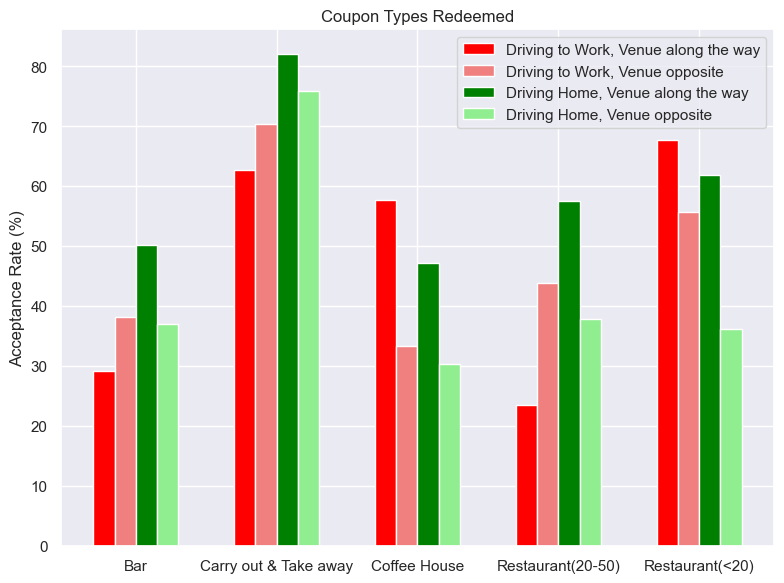

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# Create the data - Categories along the x-axis
categories = ['Bar', 
              'Carry out & Take away',
              'Coffee House', 
              'Restaurant(20-50)',
              'Restaurant(<20)']

# Render this as bar groups along the categories (x-axis)
bars_dict = {
    "Driving to Work, Venue along the way": dest_df_unstacked.loc[idx[:,'Work',1,:]]['rate'].values,
    "Driving to Work, Venue opposite": dest_df_unstacked.loc[idx[:,'Work',:,1]]['rate'].values,
    "Driving Home, Venue along the way": dest_df_unstacked.loc[idx[:,'Home',1,:]]['rate'].values,
    "Driving Home, Venue opposite": dest_df_unstacked.loc[idx[:,'Home',:,1]]['rate'].values
}

# Define colors for each bar group
colors = ['red', 'lightcoral', 'green', 'lightgreen']

label_t='Coupon Types Redeemed'
label_y='Acceptance Rate (%)'
graph_grouping_barchart(categories, bars_dict, colors, label_t, label_y, 8, 6)